<a href="https://colab.research.google.com/github/ArshadMohammad9/AI-ML-Bootcamp-_-2216191_Mohammad-Arshad/blob/main/Linear_Regression_Case_Study_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1 - reading the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Salary_Dataset.csv')  #df is dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.shape   #Static Class

(35, 2)

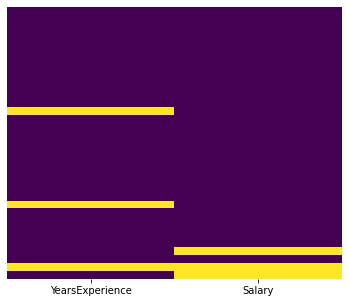

In [ ]:
#Step 2 : Visualization
# To check whether our dataset has any missing values
#Seaborn is a extended version of matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,5))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)

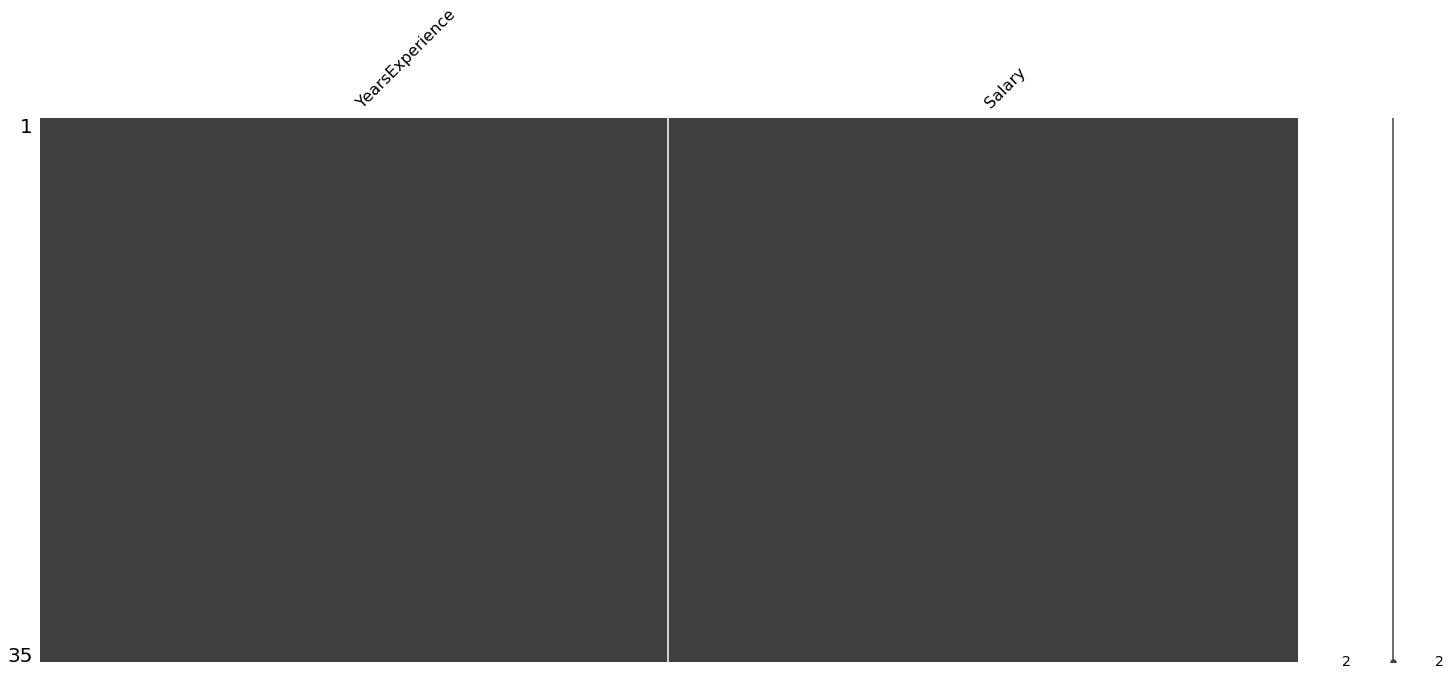

In [ ]:
#Other types of Visualization using Missingno
import missingno as msno
msno.matrix(df)

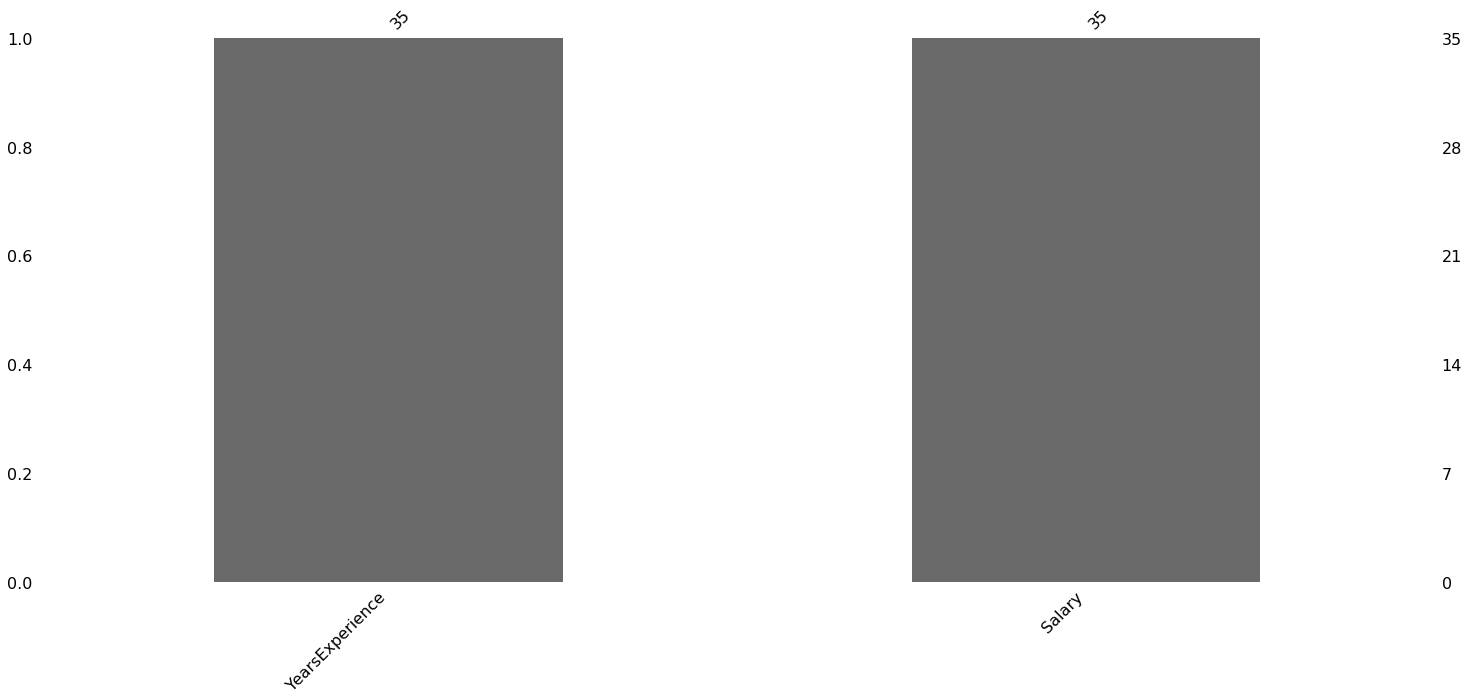

In [ ]:
msno.bar(df)

In [ ]:
#Step 3: Pre-Processing
#Delete the records having NaN values / replace them with the mean or median values

#df = df.dropna()  dropping the nan values

#Replacing values:
#say Median values
median_years = df['YearsExperience'].median()
mean_salary = df['Salary'].mean()

In [ ]:
print(median_years)
print(mean_salary)

4.7
76336.03125


In [ ]:
import math as m
mean_sal=m.floor(df['Salary'].mean())
#mean_sall = m.ceil(df['Salray'].mean())
print(mean_sal)
#print(mean_sall)

76336


In [ ]:
df['YearsExperience']=df['YearsExperience'].fillna(median_years)
df['Salary']=df['Salary'].fillna(mean_salary)

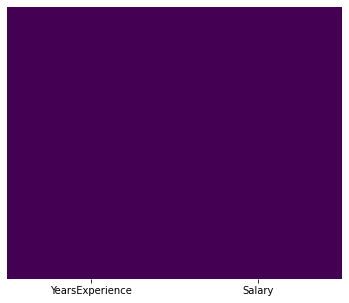

In [ ]:
get_heatmap(df)

In [ ]:
#Preparing data 
# Defining the target and input values

In [ ]:
# X - independent variable - Years of Experience
# Y - dependent variable - Salary
'''
  X = df['Years of Experiece']
  Y = df['Salary']
This way we could assign the target and input values.
Here there is a single input but there might be multiple inputs.
We use a different method in such case
We use iloc ( index loxation)[rows,colums].values
See below
'''

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values
X1 = df.iloc[:,:-1]
Y1 = df.iloc[:,-1:]

In [ ]:
# 2D array 
# ML model needs to be provided always with a 2D array.
# .values returns 2D array

In [ ]:
# Step 5 
# Splitting the data into training set and testing set.
# We use a library called sklearn

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=0)

**TRAINING:**
**Step -5 Feeding the Model/ Fitting the data based on algorithm**

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Usually aftet importing a class or method we need to call it by using its name and ().
# Usually clasess start with Capital Letters


**Fitting the Algorithm**

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

**Testing**

In [ ]:
#Exam
y_predict = model.predict(x_test)      # y_predict is the answer sheet by model

**Model Evaluation**

The model's training accuracy is: 0.7784334679409564


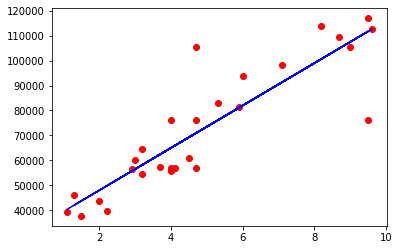

In [ ]:
#Training accuracy

y_predict2 = model.predict(x_train)

plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, y_predict2, color='blue')

accuracy_train = model.score(x_train,y_train)
print("The model's training accuracy is:", accuracy_train)

Text(0.5, 1.0, 'ML model Results')

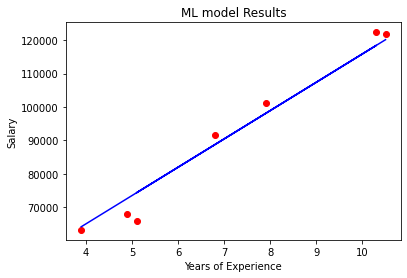

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_predict,color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("ML model Results")

In [ ]:
accuracy = model.score(x_test,y_test)
print("The Model accuracy is ", accuracy)

The Model accuracy is  0.9674057840235948


**Deployment**

In [ ]:
import math as m
years = int(input("Enter your experience:"))
y = model.predict([[years]])
print("Your expected salary is ", m.floor(y))

Enter your experience:4
Your expected salary is  65000
